# Use case 1- Default of Credit Card Clients


### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data:

In [2]:
# importing the data set into pandas `DataFrame` and viewing the first 5 rows
credit_data = pd.read_excel('default of credit card clients.xls', header=1)
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Assessment And Cleaning

In [3]:
# reformating the comumns names to lower case
new_columns = {}
for col in credit_data.columns:
    new_col = col.lower()
    new_columns[col] = new_col
credit_data = credit_data.rename(columns=new_columns)

In [4]:
# checking the success of the previous step
credit_data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# viewing the shape of the data set
print('The number of rows is {} row'.format(credit_data.shape[0]))
print('The number of columns is {} column'.format(credit_data.shape[1]))

The number of rows is 30000 row
The number of columns is 25 column


In [6]:
# viewing general information about the columnns
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                            30000 non-null int64
limit_bal                     30000 non-null int64
sex                           30000 non-null object
education                     29669 non-null object
marriage                      29677 non-null object
age                           30000 non-null int64
pay_0                         30000 non-null int64
pay_2                         30000 non-null int64
pay_3                         30000 non-null int64
pay_4                         30000 non-null int64
pay_5                         30000 non-null int64
pay_6                         30000 non-null int64
bill_amt1                     30000 non-null int64
bill_amt2                     30000 non-null int64
bill_amt3                     30000 non-null int64
bill_amt4                     30000 non-null int64
bill_amt5                     30000 non-null int64
bill_amt6            

In [7]:
# checking for Dublicates
credit_data.duplicated().sum()

0

> There is no dublicates in the dataset

In [8]:
# checking for missing values
credit_data.isna().sum()

id                              0
limit_bal                       0
sex                             0
education                     331
marriage                      323
age                             0
pay_0                           0
pay_2                           0
pay_3                           0
pay_4                           0
pay_5                           0
pay_6                           0
bill_amt1                       0
bill_amt2                       0
bill_amt3                       0
bill_amt4                       0
bill_amt5                       0
bill_amt6                       0
pay_amt1                        0
pay_amt2                        0
pay_amt3                        0
pay_amt4                        0
pay_amt5                        0
pay_amt6                        0
default payment next month      0
dtype: int64

> It seems that the education and marriage comlumns hav missing values so let's view the percentage of the missing values in order to help us taking the right decision

In [9]:
# viewing the percentage of the missing values
porp_of_edu_missing_values = (credit_data.education.isna().sum() / credit_data.shape[0]) * 100
porp_of_marriage_missing_values = (credit_data.marriage.isna().sum() / credit_data.shape[0]) * 100
print('The percentage of missing values in the education column is {} %'.format(porp_of_edu_missing_values))
print('The percentage of missing values in the marriage column is {} %'.format(porp_of_marriage_missing_values))

The percentage of missing values in the education column is 1.1033333333333333 %
The percentage of missing values in the marriage column is 1.0766666666666667 %


> The percentage is about 1% for the two columns with missing values so I will choose to remove these values

In [10]:
# removing the rows with missing values
credit_data.dropna(axis=0, inplace=True)

In [11]:
# checking the success of removing the rows with missing values
# this should run without an assertion error
assert credit_data.isna().sum().sum() == 0

In [12]:
# viewing the shape of the data set after removing the missing values
print('the shape of the data set after removing the missing values is {}'.format(credit_data.shape))

the shape of the data set after removing the missing values is (29351, 25)


In [13]:
#viewing summary statistics of the data frame
credit_data.describe()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
count,29351.000000,29351.000000,29351.000000,29351.00000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,...,29351.000000,29351.000000,29351.000000,29351.000000,2.935100e+04,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000
mean,14987.993765,168270.031004,35.424244,-0.01741,-0.133215,-0.165923,-0.221015,-0.265953,-0.290280,50981.534939,...,43196.697728,40308.864672,38915.298559,5639.660966,5.870514e+03,5187.081905,4821.544343,4796.015298,5193.879868,0.222343
std,8658.506676,129978.839521,9.495480,1.12609,1.200839,1.200595,1.172474,1.137168,1.152862,73457.706806,...,64315.255250,60809.903678,59605.713552,15842.478777,2.205772e+04,16846.579800,15350.441039,15159.798191,17663.562225,0.415828
min,1.000000,10000.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3483.000000,...,2303.000000,1760.500000,1263.000000,991.000000,8.145000e+02,390.000000,291.000000,259.000000,130.000000,0.000000
50%,14982.000000,140000.000000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22206.000000,...,19005.000000,18078.000000,17080.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1501.000000,1500.000000,0.000000
75%,22481.500000,240000.000000,41.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,66685.000000,...,54425.500000,50225.000000,49276.500000,5007.000000,5.000000e+03,4505.000000,4027.000000,4077.500000,4001.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


> From the First glance It seems that age column clearly has outliers because it has a maximum of 267

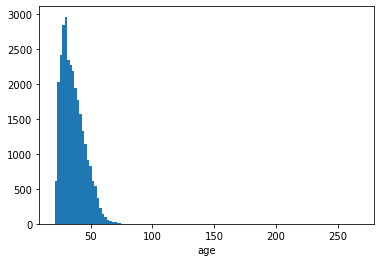

In [14]:
# viewing the distribution of the age column
base_color = sns.color_palette()[0]
min_age = credit_data.age.min()
max_age = credit_data.age.max()
bins = np.arange(min_age, max_age+2, 2)
sns.distplot(credit_data.age, bins=bins, color=base_color, kde=False, hist_kws={'alpha':1});

> The distribution is right skewed with most of the data points below 75

In [15]:
# viewing the data points with age more than 80
credit_data.query('age > 80')

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
4011,4012,50000,male,university,single,149,0,0,0,0,...,9430,9638,9801,3473,2294,328,350,323,312,0
4116,4117,70000,female,high school,single,126,0,0,0,0,...,11578,13408,12302,1500,2000,2000,2000,1000,2000,1
5395,5396,490000,female,university,married,152,-1,-1,-1,-1,...,7000,0,4341,22595,762,7000,0,4341,1061,0
6963,6964,470000,male,graduate school,married,140,2,0,0,0,...,138087,109094,106004,10000,5214,4500,5000,4200,5000,1
7318,7319,360000,female,graduate school,single,228,0,0,0,0,...,144485,145601,140336,5708,6059,5009,5021,5027,100017,0
8940,8941,200000,female,high school,married,267,0,0,0,0,...,150852,151996,147690,17014,15019,15000,15000,10000,10000,0
29496,29497,80000,male,university,married,235,-1,-1,-1,-1,...,397,42857,41864,2702,1246,397,42860,7,118,0


> There are seven data points with age more than 80 years (from 126 to 267) so I will choose to remove these values

In [16]:
# removing the rows with age more than 80
credit_data = credit_data.query('age <= 80')

In [17]:
# removing the `id` column becuase it will not be needed
credit_data.drop('id', axis=1, inplace=True)

In [18]:
# changing the name of the target variable
credit_data = credit_data.rename(columns={'default payment next month': 'target'})

In [19]:
credit_data.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## EDA

In [20]:
numeric_vars = credit_data.select_dtypes(np.number).columns

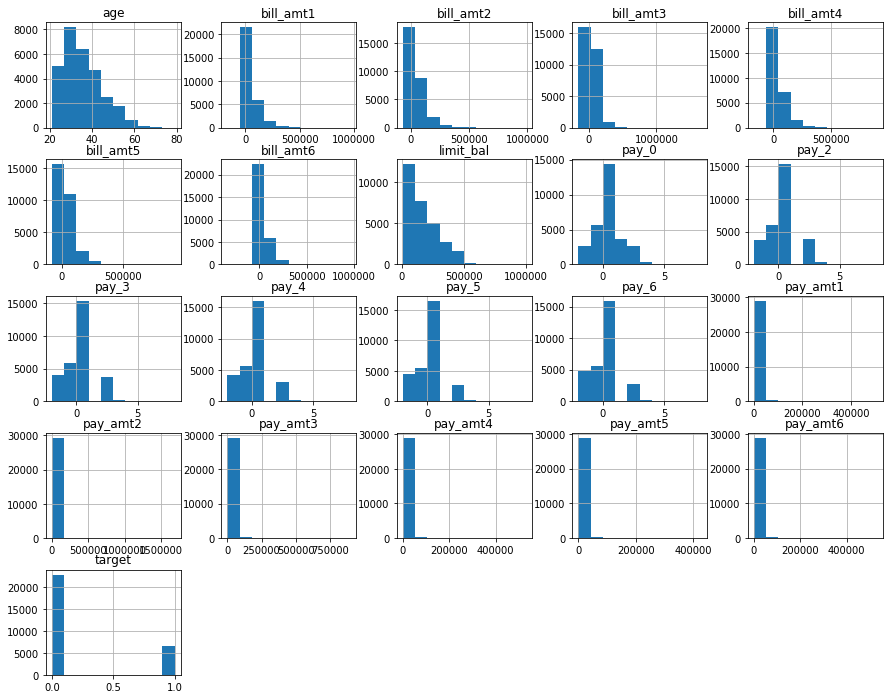

In [21]:
# a quick look at the distribution of all numerical variables
credit_data.hist(figsize=(15, 12));

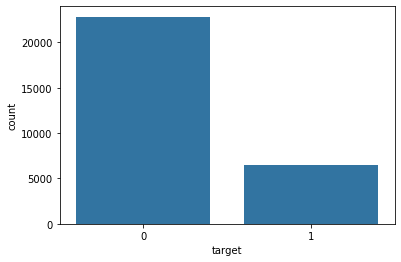

In [22]:
# viewing the distribution of the target variable
sns.countplot(credit_data.target, color=base_color);

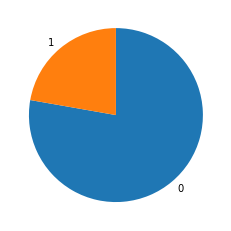

In [23]:
plt.pie(credit_data.target.value_counts(), labels=credit_data.target.value_counts().index, startangle=90, counterclock=False);

> It seems that the data is unbalanced with most data points are negative

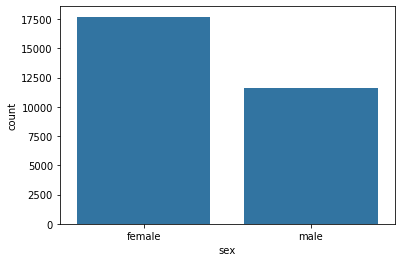

In [24]:
# checking the distribution of the sex column
sns.countplot(credit_data.sex, color=base_color);

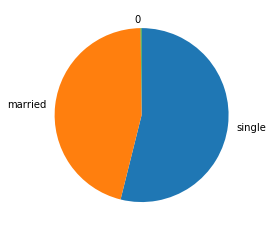

In [25]:
# checking the distribution of the marriage column
marr_counts = credit_data.marriage.value_counts()
marr_labels = marr_counts.index
plt.pie(marr_counts, labels=marr_labels, startangle=90, counterclock=False);

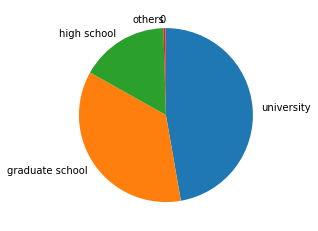

In [26]:
# checking the distribution of education column
edu_counts = credit_data.education.value_counts()
edu_labels = edu_counts.index
plt.pie(edu_counts, labels=edu_labels, startangle=90, counterclock=False);

In [27]:
credit_data.education.value_counts()

university         13865
graduate school    10533
high school         4811
others               121
0                     14
Name: education, dtype: int64

> It seems that most clients have an undergraduate degree

> Now let's try to find if there is a relation between education and target variable

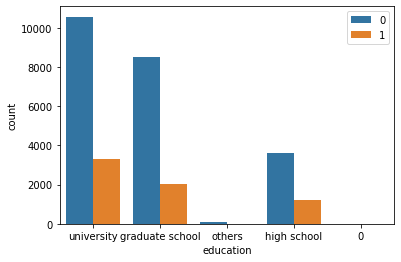

In [28]:
sns.countplot(credit_data.education, hue=credit_data.target);
plt.legend(loc='upper right');

> It seems that about one third of each category is positive

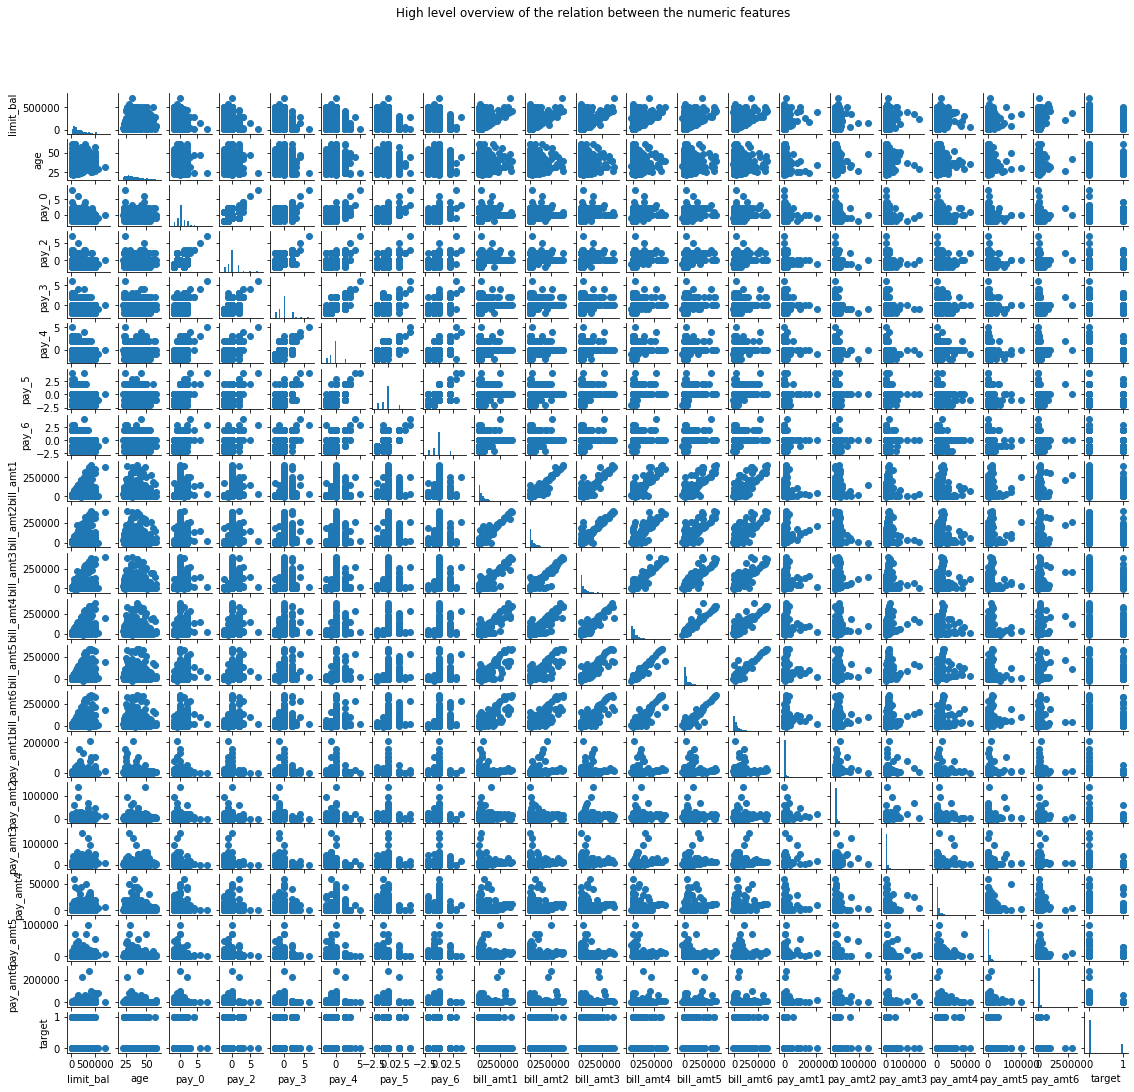

In [29]:
# plot matirx: sample 500 data points so that plots are clearer and they render faster
samples = np.random.choice(credit_data.shape[0], 500, replace=False)
credit_samples = credit_data.loc[samples, :]
g = sns.PairGrid(data=credit_samples, vars=numeric_vars)
g.fig.set_size_inches(15,15)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);
plt.suptitle('High level overview of the relation between the numeric features')
plt.subplots_adjust(top=0.9);

#### Now let's see how the variables correlate together

In [30]:
credit_data.corr()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
limit_bal,1.000000,0.151570,-0.272359,-0.297315,-0.286965,-0.267431,-0.249927,-0.236252,0.282254,0.275367,...,0.292401,0.294186,0.288275,0.202822,0.184015,0.218095,0.206908,0.217246,0.219166,-0.154051
age,0.151570,1.000000,-0.043052,-0.052662,-0.055874,-0.052909,-0.056271,-0.052790,0.055530,0.053220,...,0.051268,0.049516,0.047438,0.026331,0.023329,0.031365,0.021989,0.021317,0.021068,0.013091
pay_0,-0.272359,-0.043052,1.000000,0.672727,0.575382,0.539678,0.510241,0.475379,0.188104,0.190635,...,0.179438,0.181112,0.177630,-0.082401,-0.071873,-0.072532,-0.064641,-0.060602,-0.059814,0.326383
pay_2,-0.297315,-0.052662,0.672727,1.000000,0.767204,0.662902,0.623084,0.576272,0.236121,0.236226,...,0.222672,0.221842,0.219458,-0.083923,-0.060063,-0.057590,-0.047434,-0.039259,-0.037045,0.263958
pay_3,-0.286965,-0.055874,0.575382,0.767204,1.000000,0.777595,0.686692,0.633482,0.209796,0.238535,...,0.228182,0.226167,0.223590,0.002740,-0.068592,-0.054598,-0.046438,-0.035696,-0.036405,0.234485
pay_4,-0.267431,-0.052909,0.539678,0.662902,0.777595,1.000000,0.820051,0.717027,0.204303,0.227224,...,0.247119,0.244175,0.240858,-0.008443,-0.000950,-0.071429,-0.043777,-0.032673,-0.027003,0.214703
pay_5,-0.249927,-0.056271,0.510241,0.623084,0.686692,0.820051,1.000000,0.817729,0.208208,0.228235,...,0.272642,0.270631,0.263727,-0.005061,-0.001935,0.010624,-0.059310,-0.032905,-0.023171,0.203875
pay_6,-0.236252,-0.052790,0.475379,0.576272,0.633482,0.717027,0.817729,1.000000,0.209275,0.228733,...,0.267236,0.291460,0.285877,-0.001071,-0.005581,0.004789,0.018871,-0.046836,-0.025985,0.186880
bill_amt1,0.282254,0.055530,0.188104,0.236121,0.209796,0.204303,0.208208,0.209275,1.000000,0.951255,...,0.861325,0.831477,0.805331,0.144232,0.100747,0.161578,0.160218,0.166594,0.175000,-0.018798
bill_amt2,0.275367,0.053220,0.190635,0.236226,0.238535,0.227224,0.228235,0.228733,0.951255,1.000000,...,0.893576,0.861604,0.834525,0.291160,0.102226,0.154591,0.148026,0.157553,0.169835,-0.013224


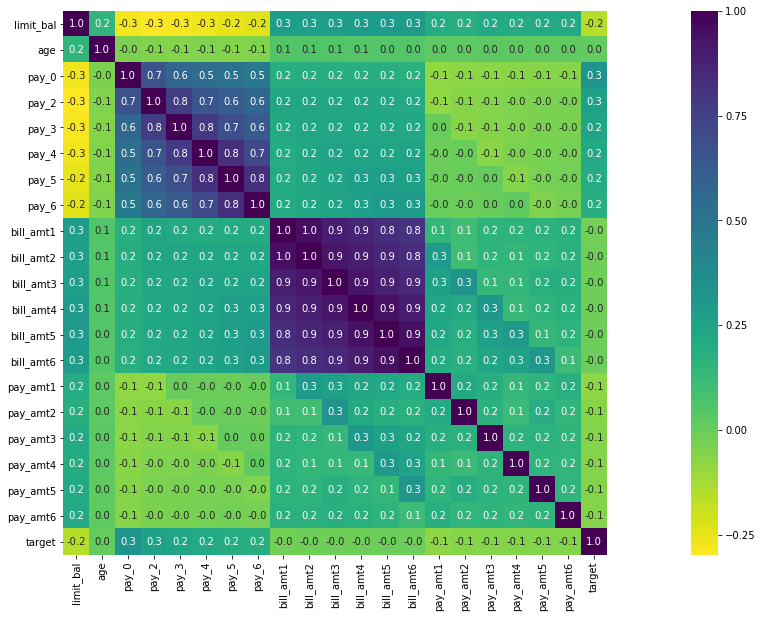

In [31]:
correlation = credit_data.corr()
plt.subplots(figsize=(30,10))
ax = sns.heatmap(correlation, square=True, annot=True, fmt=".1f", cmap='viridis_r' );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Preparing data for training

In [32]:
# dealing with categorical variables
credit_data.sex = credit_data.sex.map({'male': 1, 'female': 0})
credit_data.marriage = credit_data.marriage.map({'married': 1, 'single': 0})
credit_data.education = credit_data.education.map({0: 0, 'others': 1, 'high school': 2,
                                                   'university': 3, 'graduate school': 4})
credit_data.rename(columns={'sex': 'is_male', 'marriage': 'is_married'})

,limit_bal,is_male,education,is_married,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,20000,0,3,1.0,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,3,0.0,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,3,0.0,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,3,1.0,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,3,1.0,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,2,1.0,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,2,0.0,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,3,0.0,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,2,1.0,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [33]:
credit_data.rename(columns={'sex': 'is_male', 'marriage': 'is_married'}, inplace=True)

In [34]:
credit_data.head()

,limit_bal,is_male,education,is_married,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,20000,0,3,1.0,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,3,0.0,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,3,0.0,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,3,1.0,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,3,1.0,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
# normalizing the numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vars_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
credit_data[vars_to_norm] = scaler.fit_transform(credit_data[vars_to_norm])

In [36]:
credit_data.head()

,limit_bal,is_male,education,is_married,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,-1.140769,0,3,1.0,-1.241275,2,2,-1,-1,-2,...,-0.671587,-0.662789,-0.652795,-0.355908,-0.234898,-0.307877,-0.314021,-0.316353,-0.294002,1
1,-0.371287,0,3,0.0,-1.023288,-1,2,0,0,0,...,-0.620710,-0.605970,-0.598084,-0.355908,-0.220800,-0.248523,-0.248876,-0.316353,-0.180730,1
2,-0.602132,0,3,0.0,-0.151337,0,0,0,0,0,...,-0.448752,-0.416963,-0.391921,-0.260096,-0.198134,-0.248523,-0.248876,-0.250396,-0.010822,0
3,-0.909924,0,3,1.0,0.175644,0,0,0,0,0,...,-0.231329,-0.186546,-0.157069,-0.229674,-0.174607,-0.236652,-0.242361,-0.245845,-0.237366,0
4,-0.909924,1,3,1.0,2.355520,-1,0,-1,0,0,...,-0.345988,-0.347925,-0.331824,-0.229674,1.396664,0.285660,0.272289,-0.270908,-0.255546,0


In [37]:
credit_data.dropna(inplace=True)

In [38]:
# creating the train and test data sets
X = credit_data.iloc[:,:-1].values
y = credit_data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Training `Logistic Regression ` model

In [39]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=1)
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
y_pred = log_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811006,0.722913,0.24893,0.370337


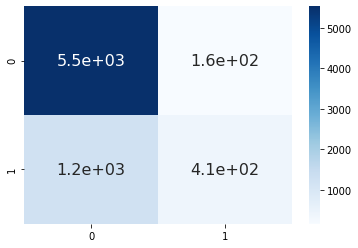

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
g = sns.heatmap(conf_matrix, cmap="Blues", annot=True,annot_kws={"size": 16});
top, bottom = g.get_ylim()
g.set_ylim(top+0.5, bottom-0.5);

### `Random Forest` model

#### Training

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Model Evaluation

In [43]:
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random Forest Classifier', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.81442,0.641684,0.382263,0.479111


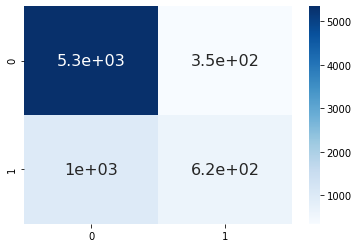

In [44]:
#plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
g = sns.heatmap(conf_matrix, cmap="Blues", annot=True,annot_kws={"size": 16})
top, bottom = g.get_ylim()
g.set_ylim(top+0.5, bottom-0.5);